# Ford-go-bike Trip Data
## by Ibrahim Sherif

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df=pd.read_csv("201902-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#Data shape
df.shape

(183412, 16)

In [4]:
#check for data type and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### We need to calculate the distance in (km) between start and end points##

In [5]:
#Function to calculate the distance between any two points given the lat. and long. values
from numpy import radians, cos, sin, arcsin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [6]:
# Adding new column for distance in km
df["distance_km"]=haversine(df["start_station_longitude"],df["start_station_latitude"],df["end_station_longitude"],df["end_station_latitude"])

In [7]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_km
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.544709
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,1.742999
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2.704545
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.260739
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2.409301


In [8]:
#We need to remove the start and end latitute and longitude columns
df.drop(columns={"start_station_latitude","start_station_longitude","end_station_latitude","end_station_longitude"},inplace=True)

In [9]:
#Convert start_time from object to datetime
df["start_time"]=pd.to_datetime(df["start_time"], format='%Y-%m-%d %H:%M:%S.%f')


In [10]:
#Create new column for start day
df["start_day"]=df["start_time"].dt.day_name()

In [11]:
#Add new column for the age (assuming that we are now in 2019)
df["age"]=2019-df["member_birth_year"]

In [12]:
#the Final dataframe
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_km,start_day,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,0.544709,Thursday,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No,1.742999,Thursday,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2.704545,Thursday,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,0.260739,Thursday,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2.409301,Thursday,45.0


In [13]:
df.shape

(183412, 15)

In [14]:
#Finally
# List of days in order
day_order = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
# create ordered categorical variable
df['start_day'] = pd.Categorical(df['start_day'], categories= day_order, ordered = True)
                                               

### What is the structure of your dataset?

> The dataset consists of 183,412 rows with 15 features. We have added new column for the distance in KM and a new column for
the starting day for each trip. Also a new column for age is added assuming that we are now on 2019.
### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest is the duration of the trip. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The distance covered during each trip. also the age and gender of the members and there effect on the duration. Also the starting day for the trips. Finally it's very important to focus on if the member is customer or subscriber and how that affect all the previous features.

## Univariate Exploration

> First we will start with investigating the duartion of the trips

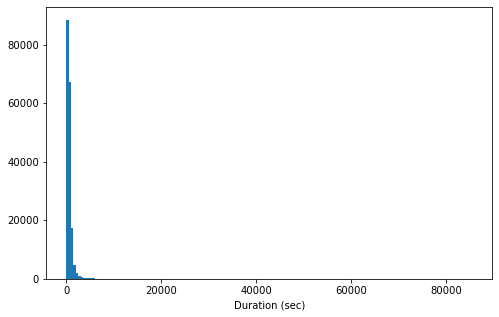

In [15]:
#normal scale
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(df["duration_sec"], bins=bins);
plt.xlabel('Duration (sec)')
plt.show()

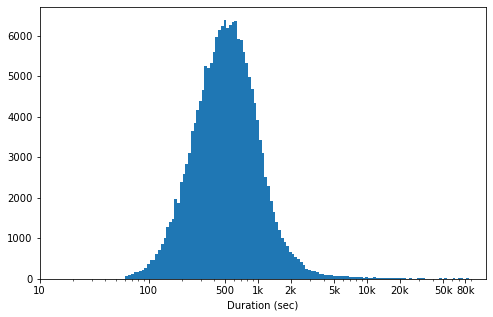

In [16]:
#Log-scale
log_binsize = 0.025
bins = 10 ** np.arange(np.log10(df['duration_sec'].min()), np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(df["duration_sec"], bins=bins);
plt.xscale('log')
plt.xticks([10,100,500, 1e3,2e3, 5e3, 1e4,2e4, 5e4, 8e4], [10,100,500, '1k','2k', '5k', '10k','20k', '50k', '80k'])
plt.xlabel('Duration (sec)')
plt.show()

### Duration has long-tailed distribution as the histogram is right skewed with one peak between 500 and 1000 sec.

> ### Now, let's have a look on the distribution of distance covered in each trip.

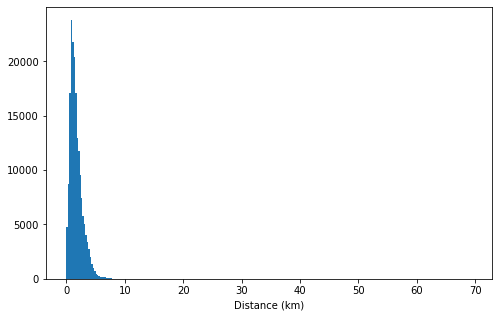

In [17]:
#normal scale
binsize = 0.25
bins = np.arange(0, df['distance_km'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(df["distance_km"], bins=bins);
plt.xlabel('Distance (km)')
plt.show()

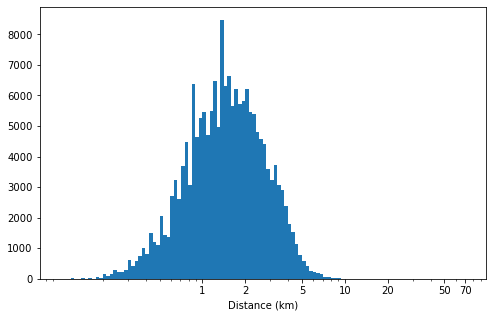

In [18]:
#Log-scale
log_binsize = 0.025
bins = 10 ** np.arange(-1, np.log10(df['distance_km'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(df["distance_km"],bins=bins);
plt.xscale('log')
plt.xticks([1, 2,5, 10, 20,50, 70], [1,2,5, 10, 20,50, 70])
plt.xlabel('Distance (km)')
plt.show()

### We can find that most of the trips ranges from 1 to 2 km distance. Also it appears that there are outliers above 10 km. we can confirm that using box plot.

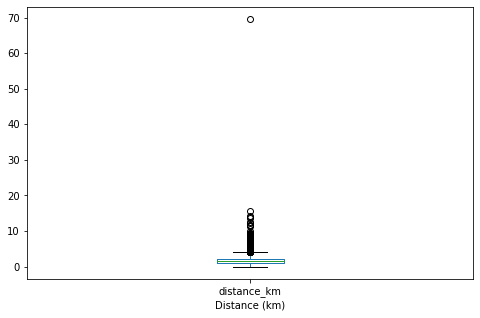

In [19]:
#box plot for distance of trips in km
plt.figure(figsize=[8, 5])
df["distance_km"].plot(kind='box')
plt.xlabel('Distance (km)')
plt.show()

### So we have to remove the outliers then plot the boxplot again.

In [15]:
#remove distances > 10km
df=df[df["distance_km"]<=10]

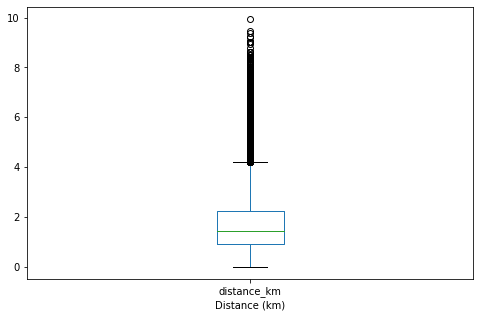

In [16]:
#re-plot the box plot to check for outliers
plt.figure(figsize=[8, 5])
df["distance_km"].plot(kind='box')
plt.xlabel('Distance (km)')
plt.show()

### Now it's much better.

> ### Let's move one to see the distribution if the members' ages

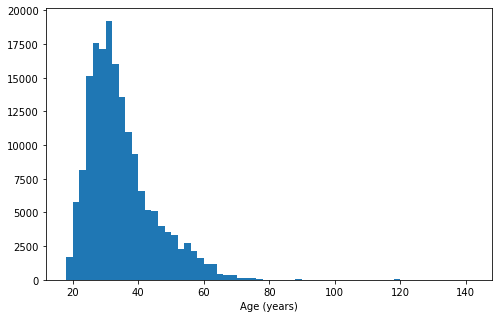

In [17]:
#normal scale
binsize = 2
bins = np.arange(df['age'].min(), df['age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(df["age"], bins=bins);
plt.xlabel('Age (years)')
plt.show()

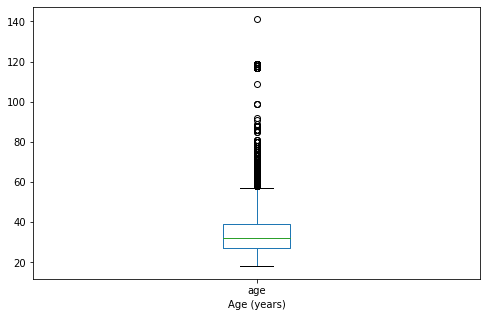

In [23]:
plt.figure(figsize=[8, 5])
df["age"].plot(kind='box')
plt.xlabel('Age (years)')
plt.show()

### It is clear that most of the members ranges from 20 to 40 years old, also there are outliers in the age column. So we can consider the members of age more than 60 years as outlier. 

In [18]:
#Let's remove the age outliers by selecting the ages only less than 60 years old
df=df[df["age"]<=60]

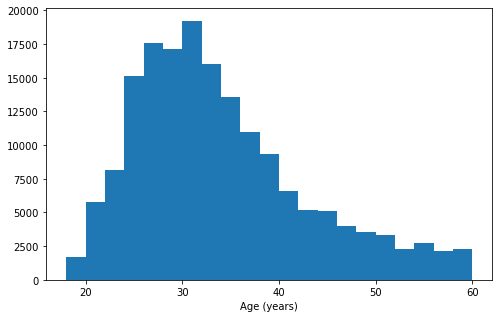

In [25]:
#repeate the distribution of age after removing the outliers
binsize = 2
bins = np.arange(df['age'].min(), df['age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(df["age"], bins=bins);
plt.xlabel('Age (years)')
plt.show()

### Now it is much more better, the maximum age now is 60 years. and the peak is between 30 and 40 years old.

> ### Now let's have a look on the gender, membership and starting day for the trips.

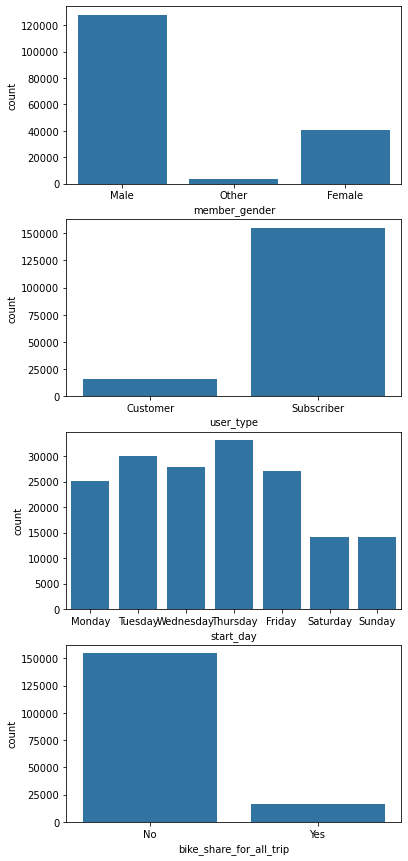

In [20]:
# let's plot all three together to get an idea of each nominal variable's distribution.

fig, ax = plt.subplots(nrows=4, figsize = [6,15])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'member_gender', color = default_color, ax = ax[0])
sb.countplot(data = df, x = 'user_type', color = default_color, ax = ax[1])
sb.countplot(data = df, x = 'start_day', color = default_color, ax = ax[2])
sb.countplot(data = df, x = 'bike_share_for_all_trip', color = default_color, ax = ax[3])

plt.show()

### From the plots above we can conclude that the most users are men and most of them are subscribers. Also we can find that the most likely day to start the trips is Thursday and unlike our expectation the least days are the weekends. Finally, there are few members who shared in all trips

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration variable had a large range of values, so we used the log transformation to have better understanding. We found that there are only one peak between 500 and 1000 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> During investigating the distance feature we found that the distribution was right skewed so we used log transformation so we concluded that most of the trip distances range between 1 to 2 km. Also while investigation the age of users we found some outlieres as the ages are much higher than 60 years old and reached 140 years !. So we removed the outliers by considering the maximum age to be 60 years old.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in
data. 

First let's study the correlation between different numeric features in the data

In [27]:
numeric_vars=['duration_sec','distance_km','age']

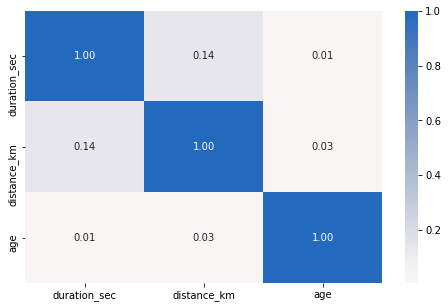

In [28]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

### It appears that there are no correlation between duration, distance and age. which means non of that factors affect the duration of the trip.

> ### Let's see the relation between the nominal values on the duration

(50.0, 2000.0)

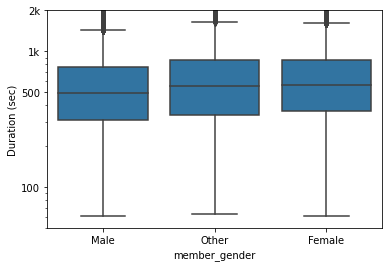

In [29]:
# Relation between duration and gender
sb.boxplot(data=df, y="duration_sec", x="member_gender",color=default_color)
plt.yscale("log")
plt.yticks([10,100,500, 1e3,2e3, 1e4,2e4, 8e4], [10,100,500, '1k','2k', '10k','20k', '80k'])
plt.ylabel('Duration (sec)')
plt.ylim(50,2000)

### By using boxplot to compare between the trip duration for male and female, and by zooming in to exclude the large values, we can conclude that the median of duration for men is slightly less than that for female.

Text(0, 0.5, 'Duration (sec)')

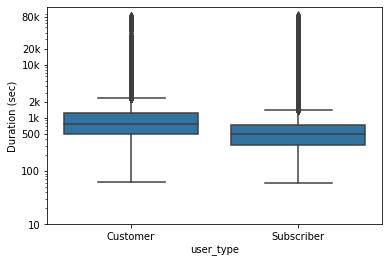

In [30]:
#Effect of user type on duration of trips
sb.boxplot(data=df, y="duration_sec", x="user_type",color=default_color)
plt.yscale("log")
plt.yticks([10,100,500, 1e3,2e3, 1e4,2e4, 8e4], [10,100,500, '1k','2k', '10k','20k', '80k'])
plt.ylabel('Duration (sec)')
#plt.ylim(10,2000)

### We also can conclude that the median of trip duration for customers is higher than that for subscribers.

Text(0, 0.5, 'Duration (sec)')

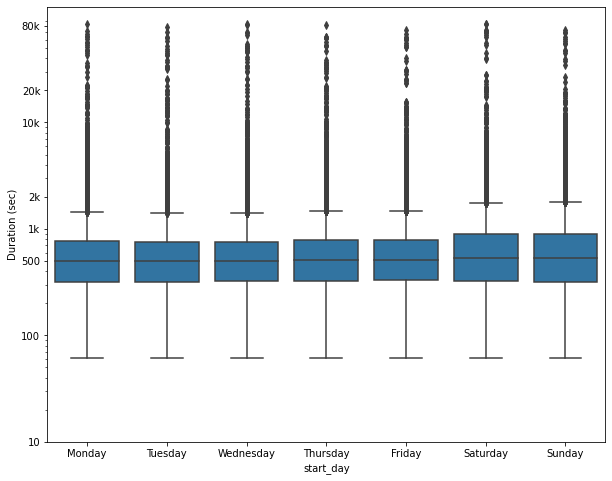

In [21]:
#Duration of trips during the week days
fig,ax=plt.subplots(figsize=[10,8])
sb.boxplot(data=df, y="duration_sec", x="start_day",color=default_color, ax=ax)
plt.yscale("log")
plt.yticks([10,100,500, 1e3,2e3, 1e4,2e4, 8e4], [10,100,500, '1k','2k', '10k','20k', '80k'])
plt.ylabel('Duration (sec)')

### On average, the starting day does not affect on the duration of the trip

Text(0, 0.5, 'Duration (sec)')

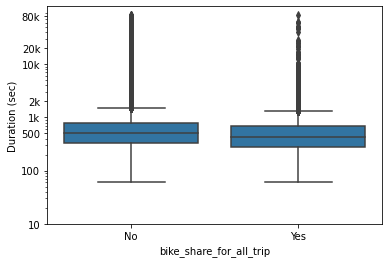

In [32]:
#Relation between users who participate in all trips with the duration of trips
sb.boxplot(data=df, y="duration_sec", x="bike_share_for_all_trip",color=default_color)
plt.yscale("log")
plt.yticks([10,100,500, 1e3,2e3, 1e4,2e4, 8e4], [10,100,500, '1k','2k', '10k','20k', '80k'])
plt.ylabel('Duration (sec)')

### We can find that the median of trip duration for members who partacipate in all trips is lower than that of the other members

> ### Let's study th relation between each two nominal features (gender, user type and starting day)

In [23]:
#remove "other" from the member_gender column
df=df[df["member_gender"]!="Other"]

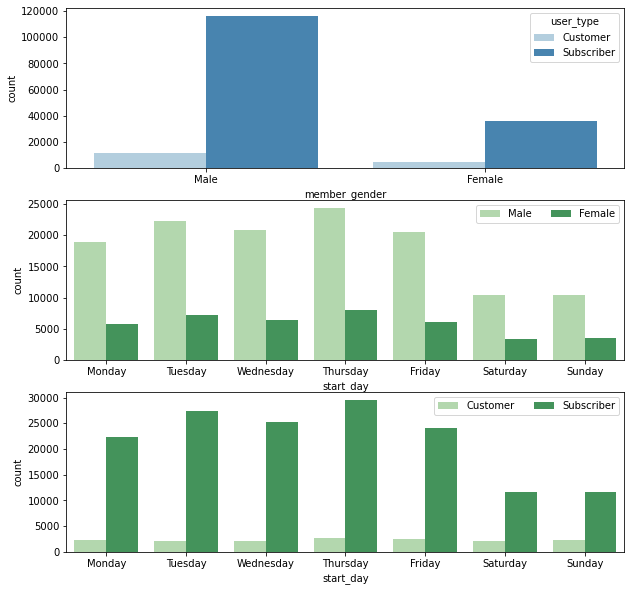

In [25]:

plt.figure(figsize = [10, 10])

# subplot 1: gender vs user type
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'member_gender', hue = 'user_type', palette = 'Blues')

# subplot 2: gender vs. starting day
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'start_day', hue = 'member_gender', palette = 'Greens')
ax.legend(loc=1,ncol = 3) # re-arrange legend to reduce overlapping

# subplot 3: user type vs. starting day
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'start_day', hue = 'user_type', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) 

plt.show()

### We can find that, the Male members are always more then female members whether the members are customers or subscribers in every day of the week. Also, the subscribers are always much more the customers.

### Did all members who partacipate in all trips are subscribers ?!

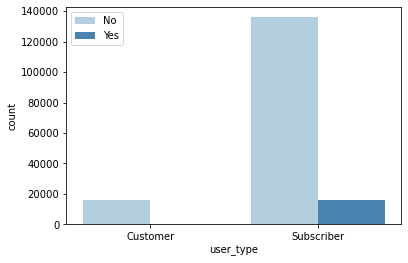

In [35]:
sb.countplot(data = df, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'Blues')
plt.legend(loc = 2, ncol = 1) 

### Yes, all the members who are partacipated in all trips are subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We discovered that, there are no correlation between the duration of trips and the trip distance or age of members. Also we found that, the average trip duration of males is less than that for females. In addition, the trip duration is lower for the subscribers than that for customers. Finally, the members who partacipated on all trips have lower average trip duration than the other members.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> By studying the relations between other features, we found that the male members are always more than female members, also the subscribers are alwayes more than costumers in all days of the week.

> Also all the members who participated in all trips are subscribers

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

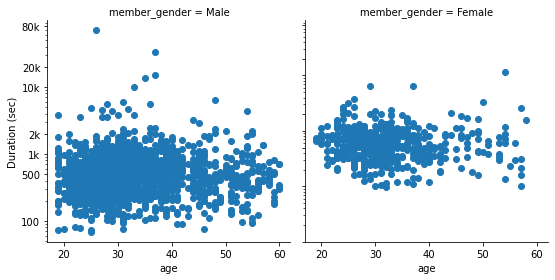

In [36]:
#relation between age and duration for male and female
#use sample of 2000 to avoid the over plotting
g=sb.FacetGrid(data=df.sample(2000), col="member_gender",height=4)
g.map(plt.scatter, "age", "duration_sec");

g.set_ylabels('Duration (sec)')
plt.yscale("log")
plt.yticks([10,100,500, 1e3,2e3, 1e4,2e4, 8e4], [10,100,500, '1k','2k', '10k','20k', '80k']);


### We can find that the duration range of Male members is much more than that for Female members.

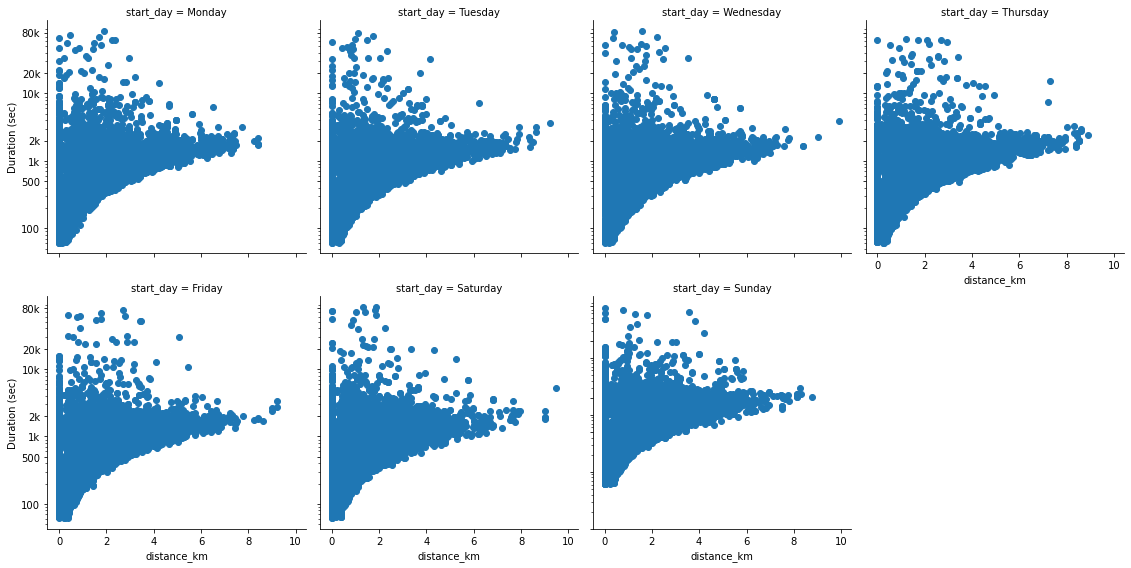

In [26]:
#relation between distance of trip and duration for all days of the week
g=sb.FacetGrid(data=df, col="start_day",height=4, col_wrap=4)
g.map(plt.scatter, "distance_km", "duration_sec");

g.set_ylabels('Duration (sec)')
plt.yscale("log")
plt.yticks([10,100,500, 1e3,2e3, 1e4,2e4, 8e4], [10,100,500, '1k','2k', '10k','20k', '80k']);

### We can find that the pattern between distance and duration of trips is nearly the same for all days of the week.

### We can see that as the distance increases, the duration of trip increases, but we still have long durations in short distances, why ?! is that due to the age of members ? or due to the gender ? or due to the continous participation of members ?!

### So let's study the relation between distance and duration for cases of different gender, age of members and if being the member partacipate in all trips or no.

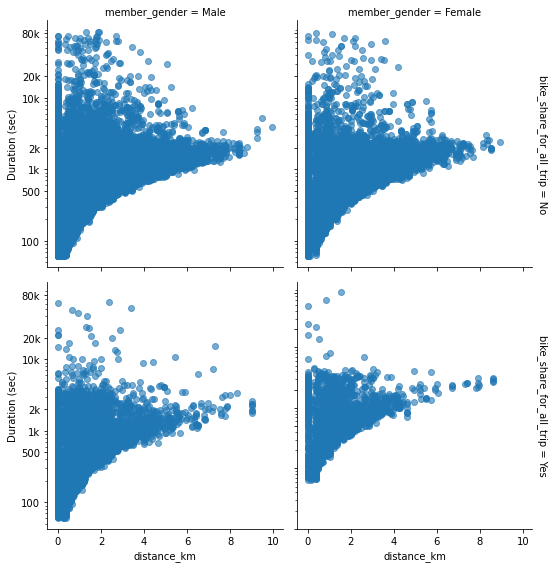

In [38]:
#relation between distance of trip and duration for different members' gender and if the member partacipated in all trips
g=sb.FacetGrid(data=df, col="member_gender", row="bike_share_for_all_trip", height=4, margin_titles = True)
g.map(plt.scatter, "distance_km", "duration_sec",alpha=0.6);

g.set_ylabels('Duration (sec)')
plt.yscale("log")
plt.yticks([10,100,500, 1e3,2e3, 1e4,2e4, 8e4], [10,100,500, '1k','2k', '10k','20k', '80k']);

### As we expected, the members who participate in most trips have lower durations for shorter distances that others. but we also concluded that, the gender does not have a significant effect.

### So let's focus more on the age of members who spent more than 5000 sec in the trips

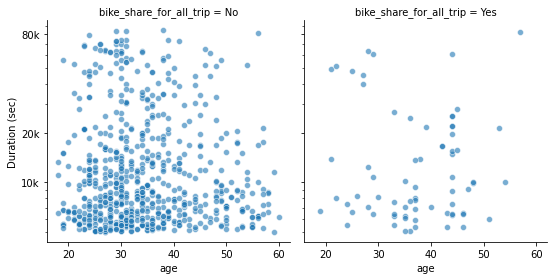

In [39]:
#Create new dataset for members who spent more than 5000 sec in trip durations
df2=df[df["duration_sec"]>5000]

#relation between age of members and duration
g=sb.FacetGrid(data=df2, col="bike_share_for_all_trip", height=4)
g.map(sb.scatterplot, "age", "duration_sec",alpha=0.6);
g.set_ylabels('Duration (sec)')
plt.yscale("log")
plt.yticks([1e4,2e4, 8e4], ['10k','20k', '80k']);

### The members who partacipate in all trips always have shorter durations for trips than others, but it seems that the age has no segnificant effect.

### Let's study the behavior of members who travel distance more than 8km.

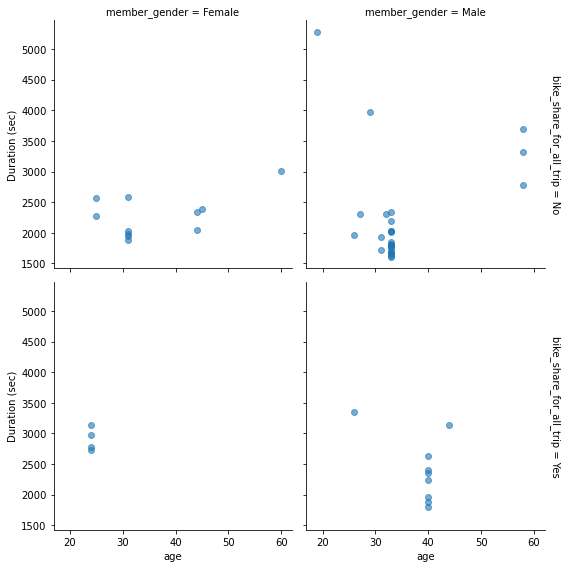

In [43]:
#dataframe for members who travelled more than 8 km
df3=df[df["distance_km"]>8]

#relation between age and duration for Male and Female members who partacipate in all trips and not. for distances more than 8km
g=sb.FacetGrid(data=df3, col="member_gender", row="bike_share_for_all_trip", height=4, margin_titles = True)
g.map(plt.scatter, "age", "duration_sec",alpha=0.6);

g.set_ylabels('Duration (sec)')


### We can find that for the members who partacipate in all trips the aberage age of Male members is 40 years while the Female members are between 20 and 30 and the trip durations are alwayes less than 3500 sec.

### While for the members who did not partacipate in all trips, the ages for some male and females members are abit larger as it reaches 60 years. also the duration of trips for male members reach 5000 sec, while for female members the durations are alwayes less than 3000 sec.

### Finally, let's study the behavior of members who travel distance more than 1km.

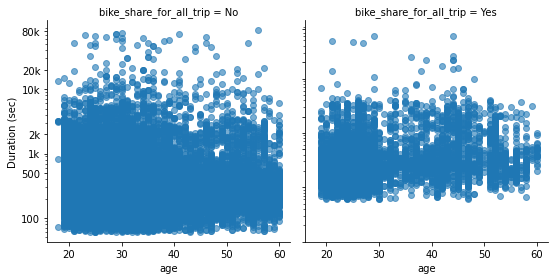

In [44]:
#dataframe for members who travelled more than 8 km
df4=df[df["distance_km"]<1]

#relation between age and duration for Male and Female members who partacipate in all trips and not. for distances more than 8km
g=sb.FacetGrid(data=df4, col="bike_share_for_all_trip",  height=4)
g.map(plt.scatter, "age", "duration_sec",alpha=0.6);

g.set_ylabels('Duration (sec)')
plt.yscale("log")
plt.yticks([10,100,500, 1e3,2e3, 1e4,2e4, 8e4], [10,100,500, '1k','2k', '10k','20k', '80k']);

### Now we are sure that the age has no effect on the duration.

### Let's study the relationship between other features together.

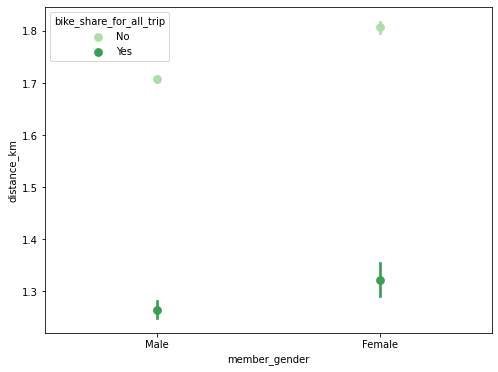

In [40]:
fig, ax = plt.subplots(figsize = [8,6])
sb.pointplot(data = df, x = 'member_gender', y = 'distance_km', hue = 'bike_share_for_all_trip',
             palette = 'Greens', linestyles = '', ax = ax)

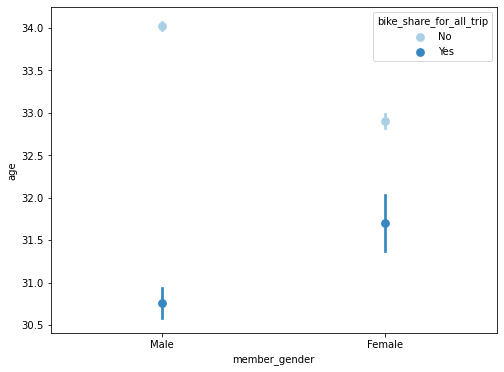

In [41]:
fig, ax = plt.subplots(figsize = [8,6])
sb.pointplot(data = df, x = 'member_gender', y = 'age', hue = 'bike_share_for_all_trip',
             palette = 'Blues', linestyles = '', ax = ax)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> By looking at the factors that may affect the duration of the trips, we can conclude that as the distance increases the duration increases, while we still have large durations in short distances that means there are other factors affects the duration. so we found that the average duration for members who partacipate in all trips is shorter than that for member who did not partacipate in all trips. While the age of members and gender of members have no effect on the duration.

### Were there any interesting or surprising interactions between features?

> There are no surprising interactions between other features, as we can see the average distance covered by male members is slightly less than the average distance covered by female members. also average age for male members who partacipate in all trips is slightly less than that for female members. 

In [42]:
#Finally, let's save the final dataset to use it in the slides part
df.to_csv('Ford_go_trip.csv')